# Segmentación de clientes con K-Means

Contexto real

Una empresa de retail online quiere segmentar a sus clientes para diseñar campañas de marketing personalizadas.
No existe una etiqueta previa que indique el tipo de cliente, por lo que se decide aplicar clustering no supervisado usando K-Means.

El objetivo es descubrir grupos de clientes con comportamientos similares basándose en sus hábitos de compra y navegación.

Importación de librerías

Importa pandas, numpy, matplotlib, seaborn y las librerías necesarias de Scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clientes_kmeans_project.csv")
df.head()

,edad,ingresos_mensuales,frecuencia_compras_mes,ticket_medio,tiempo_web_min,antiguedad_meses
0,56,1391.442309,5,43.320363,12.345429,10
1,69,2670.626428,3,43.985816,34.136270,65
2,46,3759.636983,4,62.318532,37.028698,42
3,32,2097.314778,3,65.029373,23.349757,85
4,60,2806.553726,0,60.412774,33.272951,9


Descripción de las variables

edad

ingresos_mensuales

frecuencia_compras_mes

ticket_medio

tiempo_web_min

antiguedad_meses

No existe variable objetivo, ya que se trata de clustering.

Análisis Exploratorio de Datos (EDA)

Dado que el dataset es artificial, realiza un análisis exploratorio básico.

Inspecciona la estructura y estadísticas

Observa distribuciones y relaciones

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   edad                    800 non-null    int64  
 1   ingresos_mensuales      800 non-null    float64
 2   frecuencia_compras_mes  800 non-null    int64  
 3   ticket_medio            800 non-null    float64
 4   tiempo_web_min          800 non-null    float64
 5   antiguedad_meses        800 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 37.6 KB


,edad,ingresos_mensuales,frecuencia_compras_mes,ticket_medio,tiempo_web_min,antiguedad_meses
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,43.991250,2590.450435,3.006250,45.221843,35.466928,59.921250
std,14.864298,924.438339,1.768508,19.954430,14.315362,33.803563
min,18.000000,800.000000,0.000000,5.000000,5.000000,1.000000
25%,31.750000,1977.502483,2.000000,32.085745,25.395671,30.000000
50%,45.000000,2592.523009,3.000000,45.017794,35.017533,62.000000
75%,56.000000,3210.006866,4.000000,58.839385,45.231669,88.000000
max,69.000000,5356.997923,10.000000,106.852826,95.788252,119.000000


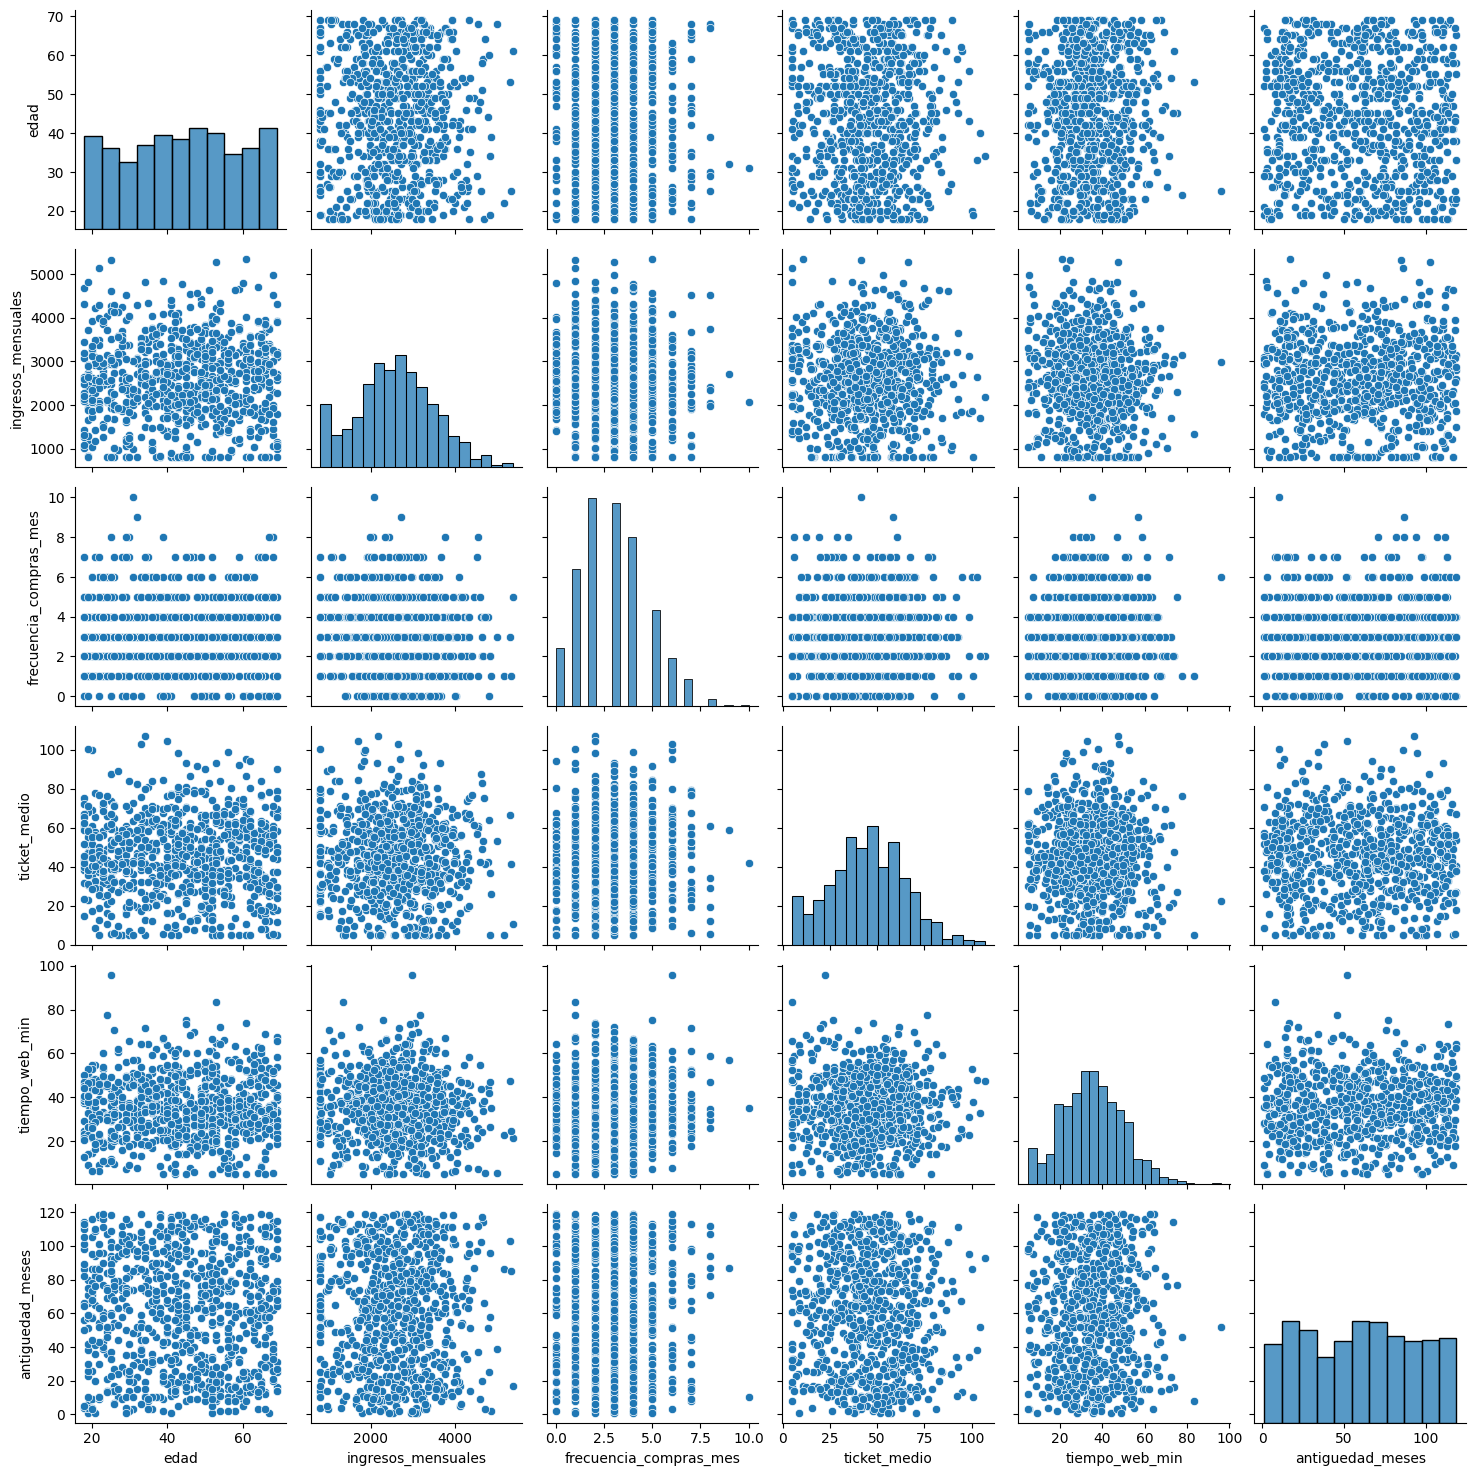

In [4]:
sns.pairplot(df)

El EDA permite detectar:

Escalas muy diferentes entre variables

Posibles correlaciones

Presencia de ruido

Estandarización de las variables

K-Means se basa en distancias euclídeas, por lo que el escalado es imprescindible.

Pasos

Importar StandardScaler

Ajustar el escalador

Transformar las variables

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
df_scaled.head()

,edad,ingresos_mensuales,frecuencia_compras_mes,ticket_medio,tiempo_web_min,antiguedad_meses
0,0.808398,-1.297824,1.128068,-0.095351,-1.616163,-1.477728
1,1.683523,0.086784,-0.003536,-0.061981,-0.093011,0.150337
2,0.135224,1.265545,0.562266,0.857323,0.109166,-0.530490
3,-0.807220,-0.533777,-0.003536,0.993259,-0.846975,0.742361
4,1.077667,0.233913,-1.700943,0.761757,-0.153356,-1.507329


Elección del número de clusters

Antes de aplicar K-Means, es necesario decidir el número de clusters k.

Método del codo

Se entrena K-Means para distintos valores de k y se observa la inercia.

In [6]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


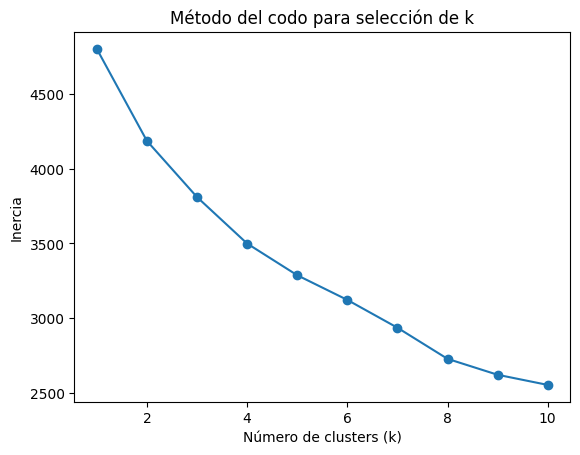

In [7]:
plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo para selección de k")
plt.show()

Interpretación

La inercia disminuye al aumentar k

El “codo” indica un buen equilibrio entre simplicidad y calidad

Supongamos que el codo aparece en k = 4

Entrenamiento del modelo K-Means

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

df["cluster"] = kmeans.labels_
df.head()


,edad,ingresos_mensuales,frecuencia_compras_mes,ticket_medio,tiempo_web_min,antiguedad_meses,cluster
0,56,1391.442309,5,43.320363,12.345429,10,0
1,69,2670.626428,3,43.985816,34.136270,65,2
2,46,3759.636983,4,62.318532,37.028698,42,0
3,32,2097.314778,3,65.029373,23.349757,85,1
4,60,2806.553726,0,60.412774,33.272951,9,0


Análisis de los clusters
Tamaño de cada cluster

In [9]:
df["cluster"].value_counts()


cluster
0    213
3    205
1    200
2    182
Name: count, dtype: int64

Perfil medio de cada cluster

In [10]:
df.groupby("cluster").mean()


,edad,ingresos_mensuales,frecuencia_compras_mes,ticket_medio,tiempo_web_min,antiguedad_meses
cluster,,,,,,
0,46.976526,2734.465027,2.638498,58.685219,29.371201,29.793427
1,34.970000,2989.363384,2.315000,48.690146,34.121189,89.895000
2,54.434066,2578.372111,2.071429,25.622745,37.983224,58.686813
3,40.419512,2062.355592,4.892683,45.249533,40.879473,63.078049


Interpretación

Cluster 0: clientes jóvenes, bajo gasto, baja antigüedad

Cluster 1: clientes fieles, gasto medio-alto

Cluster 2: clientes premium

Cluster 3: clientes ocasionales

Visualización de clusters

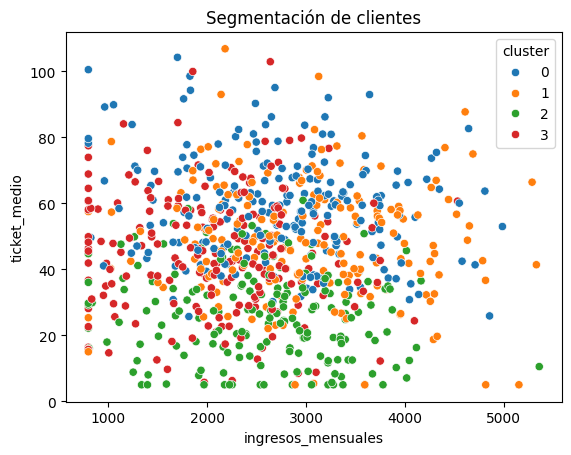

In [11]:
plt.figure()
sns.scatterplot(
    data=df,
    x="ingresos_mensuales",
    y="ticket_medio",
    hue="cluster",
    palette="tab10"
)
plt.title("Segmentación de clientes")
plt.show()


Conclusiones

K-Means permite descubrir segmentos sin etiquetas

El escalado es crítico

El método del codo es una herramienta práctica (aunque no perfecta)

Los clusters obtenidos son interpretables desde negocio